# Part 1: Inference with PyMC

In [4]:
import pymc as pm
import arviz as az
import numpy as np
import pytensor.tensor as pt

num_trials = 100
num_agents = 100

def run_coin_inference(num_trials, num_agents):

    phead = 0.11
    

    true_p_heads = np.array([phead]*num_agents)
    
    observed_heads = np.random.choice([0,1], size=(num_agents, num_trials), 
                                      replace = True, 
                                      p=[1-phead, phead]).flatten().astype(float)
    
    vector = np.array([i for i in range(num_agents) for _ in range(num_trials)])
    
    with pm.Model() as hierarchical_model:
        # Hyperpriors for the group parameters
        alpha = pm.Gamma('alpha', alpha=1, beta=1)
        beta = pm.Gamma('beta', alpha=1, beta=1)
        
        # Individual participant probabilities of heads
        p_heads = pm.Beta('p_heads', alpha=alpha, beta=beta, shape=num_agents)
        
        # Likelihood of observed data
        observations = pm.Bernoulli('observations', 
                                      p = p_heads[vector], 
                                      observed = observed_heads)
        
        # Posterior sampling
        # trace = pm.sample(2000, return_inferencedata=True, target_accept=0.95)
        trace = pm.sample(chains = 1, draws = 2_000, tune = 5_00)
        pm.compute_log_likelihood(trace)
    
    
    print(az.waic(trace))
    waic = -2*az.waic(trace)['elpd_waic']
    print("waic=%.2f"%waic)

    return trace, waic

trace, _ = run_coin_inference(num_trials = 100, num_agents = 100)

az.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, p_heads]


Sampling 1 chain for 500 tune and 2_000 draw iterations (500 + 2_000 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Computed from 2000 posterior samples and 10000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -3413.37    66.12
p_waic       77.71        -


arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


waic=6826.74


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.512,0.501,2.582,4.430,0.009,0.007,2833.0,1604.0,NaN
beta,26.810,4.068,19.531,34.672,0.075,0.054,2980.0,1638.0,NaN
p_heads[0],0.126,0.029,0.076,0.179,0.000,0.000,3922.0,1373.0,NaN
p_heads[1],0.119,0.030,0.067,0.181,0.000,0.000,4119.0,1372.0,NaN
p_heads[2],0.088,0.025,0.043,0.133,0.000,0.000,4975.0,1553.0,NaN
...,...,...,...,...,...,...,...,...,...
p_heads[95],0.081,0.025,0.038,0.129,0.000,0.000,4161.0,1208.0,NaN
p_heads[96],0.095,0.026,0.044,0.142,0.000,0.000,5773.0,1397.0,NaN
p_heads[97],0.081,0.024,0.039,0.127,0.000,0.000,4725.0,1312.0,NaN
p_heads[98],0.135,0.029,0.081,0.187,0.000,0.000,4223.0,1404.0,NaN


In [2]:
print(az.summary(trace, var_names = ['p_heads']).mean())

arviz - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


mean            0.11467
sd              0.02770
hdi_3%          0.06517
hdi_97%         0.16645
mcse_mean       0.00002
mcse_sd         0.00000
ess_bulk     4797.95000
ess_tail     1346.44000
r_hat               NaN
dtype: float64


## Let's see how the WAIC changes with different numbers of trials

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, p_heads]


Sampling 1 chain for 500 tune and 2_000 draw iterations (500 + 2_000 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 2000 posterior samples and 100 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -22.39     4.35
p_waic       11.61        -

There has been a warning during the calculation. Please check the results.
waic=44.79


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, p_heads]


Sampling 1 chain for 500 tune and 2_000 draw iterations (500 + 2_000 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 2000 posterior samples and 300 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -117.78    11.05
p_waic       27.77        -

There has been a warning during the calculation. Please check the results.
waic=235.57


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, p_heads]


Sampling 1 chain for 500 tune and 2_000 draw iterations (500 + 2_000 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/sascha/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 2000 posterior samples and 1000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -362.24    21.21
p_waic       43.49        -

There has been a warning during the calculation. Please check the results.
waic=724.48


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, p_heads]


Sampling 1 chain for 500 tune and 2_000 draw iterations (500 + 2_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Computed from 2000 posterior samples and 3000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1059.91    36.63
p_waic       60.06        -
waic=2119.83


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, p_heads]


Sampling 1 chain for 500 tune and 2_000 draw iterations (500 + 2_000 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Computed from 2000 posterior samples and 10000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -3416.63    66.19
p_waic       75.47        -
waic=6833.26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, p_heads]


Sampling 1 chain for 500 tune and 2_000 draw iterations (500 + 2_000 draws total) took 23 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Computed from 2000 posterior samples and 30000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -10577.54   113.41
p_waic       88.85        -
waic=21155.08


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, p_heads]


Sampling 1 chain for 500 tune and 2_000 draw iterations (500 + 2_000 draws total) took 70 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Computed from 2000 posterior samples and 100000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -34775.15   207.07
p_waic       95.32        -
waic=69550.30


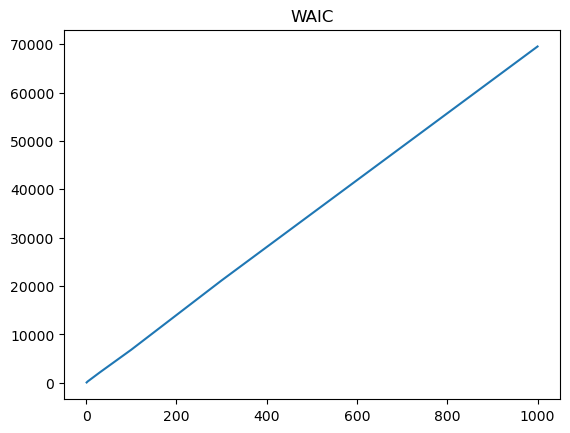

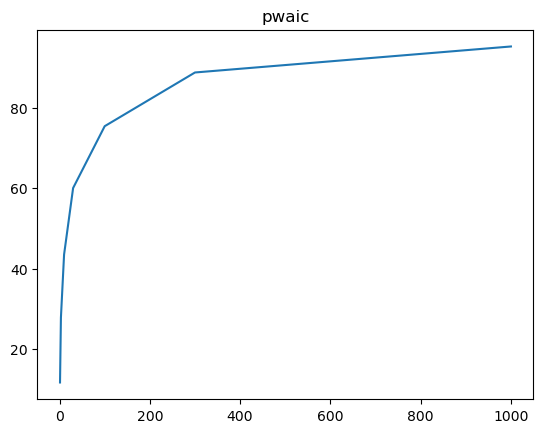

In [6]:
num_trials = [1,3,10,30,100,300,1000]
waics = []
pwaics = []

for trials in num_trials:
    trace, waic = run_coin_inference(num_trials = trials, num_agents = 100)
    waics.append(waic)
    pwaics.append(az.waic(trace)['p_waic'])

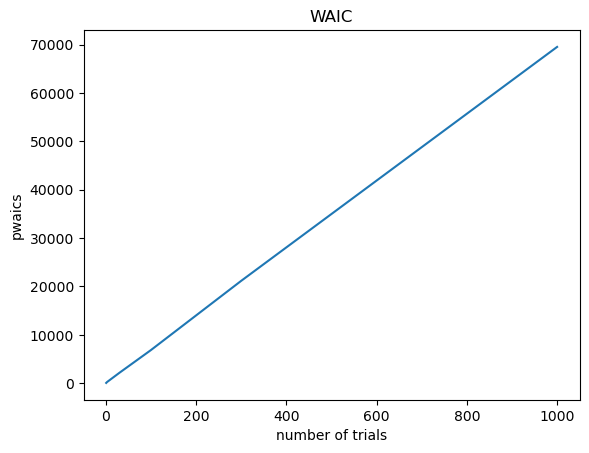

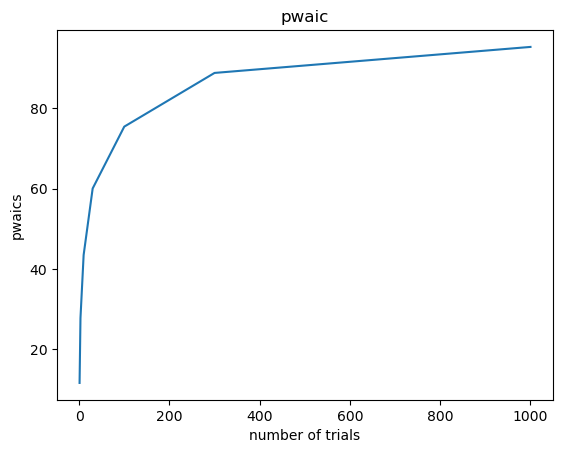

In [14]:
import matplotlib.pyplot as plt
plt.plot(num_trials, waics)
plt.xlabel('number of trials')
plt.ylabel('pwaics')
plt.title('WAIC')
plt.show()

plt.plot(num_trials, pwaics)
plt.title('pwaic')
plt.xlabel('number of trials')
plt.ylabel('pwaics')
plt.show()

The effective number of parameters, p_waic, is computed as:

$$
p_waic = \sum_{i=1}^{n} var_{post} log p(y_i | \theta),
$$

where n is the number of total trials (number of agents times number of trials per agent). This number increases rather linearly with the number of agents, but not with the number of trials. This is because, while there are more terms to add up with more trials, the posterior for each agent becomes sharper with each trial, since there is more evidence for inference.

If we want to perform a similar inference, but in pyro, then we can use the following inferenceclasse:

# Part 2: Inference in pyro

In [2]:
class CoinflipGroupInference():

    def __init__(self, agent, group_data):
        '''
        General Group inference..
        
        agent : obj
            Initialization of agent class with num_agents parallel agents.

        groupdata : tensor, shape [num_agents, num_trials]
                
        '''
        
        self.agent = agent
        self.trials = group_data.shape[-1] # length of experiment
        self.num_agents = agent.num_agents # no. of participants
        self.data = group_data # dict of lists
        self.num_trials = self.data.shape[-1]
        print(f"{self.num_trials} Trials.")
        self.num_params = len(self.agent.param_names) # number of parameters
        self.loss = []

    
    def model(self, *args):
        alpha = pyro.param('alpha', dist.Gamma(torch.ones(self.num_agents), torch.ones(self.num_agents)), constraint=dist.constraints.positive)
        beta = pyro.param('beta', dist.Gamma(torch.ones(self.num_agents), torch.ones(self.num_agents)), constraint=dist.constraints.positive)

        with pyro.plate('ag_idx', self.num_agents):
            
            locs = pyro.sample('locs', dist.Beta(alpha, beta))
            
            if locs.ndim == 1:
                locs = locs[None,:,None]
                
            if locs.ndim == 2 and locs.shape[0] == 10 and locs.shape[1] == self.num_agents:
                locs = locs[..., None]
                
            if locs.ndim == 2 and locs.shape[1] == 1 and locs.shape[0] == self.num_agents:
                locs = locs[None, ...]
                
            'Shape of phead must be [num_particles, num_agents, num_parameters]'
            self.agent.reset(locs)
            
            num_particles = locs.shape[0]
            assert locs.shape[1] == self.num_agents
            assert locs.shape[-1] == 1
            assert locs.shape[0] == 1 or locs.shape[0] == 10
            
            t = 0
            for trial in range(self.num_trials):
                # print("\n\nCHECK")
                probs = self.agent.compute_probs()
                

                pyro.sample('res_{}'.format(t), 
                            dist.Categorical(probs = probs),
                            obs = self.data[:, t])
                t+=1
                
    def guide(self, *args):
        alpha = pyro.param('alpha', dist.Gamma(torch.ones(self.num_agents), torch.ones(self.num_agents)), constraint=dist.constraints.positive)
        beta = pyro.param('beta', dist.Gamma(torch.ones(self.num_agents), torch.ones(self.num_agents)), constraint=dist.constraints.positive)
        # class Gamma(concentration, rate, validate_args=None)
        # For Gamma distribution(shape, rate), mean is shape/rate, thus 
        # Gamma(a, a/lam) -> mean = lam

        # in order to implement groups, where each subject is independent of the others, pyro uses so-called plates.
        # you embed what should be done for each subject into the "with pyro.plate" context
        # the plate vectorizes subjects and adds an additional dimension onto all arrays/tensors
        # i.e. p1 below will have the length num_agents
        with pyro.plate('ag_idx', self.num_agents):
            
            locs = pyro.sample('locs', dist.Beta(alpha, beta))
            
            if locs.ndim == 1:
                locs = locs[..., None]

        return {'alpha': alpha, 'beta': beta, 'locs': locs}

    
    def infer_posterior(self,
                        iter_steps = 1_000,
                        num_particles = 10,
                        optim_kwargs = {'lr': .01}):  # Adam learning rate
        """Perform SVI over free model parameters."""

        pyro.clear_param_store()

        svi = pyro.infer.SVI(model=self.model,
                  guide=self.guide,
                  optim=pyro.optim.Adam(optim_kwargs),
                  loss=pyro.infer.Trace_ELBO(num_particles=num_particles,
                                  vectorize_particles=True))
        loss = []
        print("Starting inference.")
        "Stop after iter_steps steps."
        pbar = tqdm(range(iter_steps), position=0)
        for step in pbar:#range(iter_steps):
            "Runs through the model twice the first time"
            loss.append(torch.tensor(svi.step()).to(device))
            pbar.set_description("Mean ELBO %6.2f" % torch.tensor(loss[-20:]).mean())
            if torch.isnan(loss[-1]):
                break

        self.loss += [l.cpu() for l in loss] # = -ELBO (Plotten!)

    def sample_posterior(self, n_samples = 1_000):
        '''

        Parameters
        ----------
        n_samples : int, optional
            The number of samples from each posterior. The default is 1_000.
            

        Returns
        -------
        TYPE
            DESCRIPTION.

        '''

        param_names = self.agent.param_names
        'Original Code'
        sample_dict = {param: [] for param in param_names}
        sample_dict["ag_idx"] = []
        for i in range(n_samples):
            sample = self.guide()
            for key in sample.keys():
                sample.setdefault(key, torch.ones(1))

            par_sample = self.agent.locs_to_pars(sample["locs"])

            for param in param_names:
                sample_dict[param].extend(list(par_sample[param].detach().numpy()))

            sample_dict["ag_idx"].extend(range(self.num_agents))

        firstlevel_df = pd.DataFrame(sample_dict)
        return firstlevel_df

    def compute_IC(self, num_samples):
        '''
            Compute information criteria for each participant individually.
        '''

        '''
            WAIC: Gelman, Andrew; Carlin, John B.; Stern, Hal S.; Rubin, Donald B. (2004). 
            Bayesian Data Analysis: Second Edition
        '''
        conditioned_model = pyro.condition(self.model, 
                                            data = {'locs': self.guide()['locs']})
        
        trace = pyro.poutine.trace(conditioned_model).get_trace()

        # Determine the number of observations across all participants (num_obs)
        num_obs = 0
        for key, val in trace.nodes.items():
            if 'res' in key and 'is_observed' in val and val['is_observed'] == True:
                num_obs += 1

        all_post_samples = {param: torch.zeros(1, num_samples, self.num_agents) for param in self.agent.param_names}
        all_post_loc_samples = torch.zeros(num_samples, self.num_agents, self.agent.num_params)
        loglike = torch.zeros(num_samples, num_obs, self.num_agents) # log-likelihood values
        like = torch.zeros(num_samples, num_obs, self.num_agents) # likelihood values

        # Sample from posterior num_samples times, and compute log-likelihood and likelihood for each iteration
        for i in range(num_samples):
            if i % 100 == 0:
                print(f"Iterating to compute WAIC, step {i}.")
            
            locs = torch.clone((self.guide()['locs']))
            conditioned_model = pyro.condition(self.model, 
                                                data = {'locs': locs})
            
            outdict = self.agent.locs_to_pars(locs)
            for j in range(self.num_agents):
                for param in self.agent.param_names:
                    all_post_samples[param][0, i, j] = outdict[param][j].item()
            
            for j in range(self.agent.num_params):
                all_post_loc_samples[i, :, j] = locs[:, j]
                
            
            trace = pyro.poutine.trace(conditioned_model).get_trace()
            
            obsidx = 0
            for key, val in trace.nodes.items():
                if 'res' in key and 'is_observed' in val and val['is_observed'] == True:
                    choices = val['value']
                    # obsmask = val['mask'].type(torch.int)
                    probs = val['fn'].probs
                    
                    choice_probs = probs[range(self.num_agents), choices]
                    
                    '''
                        likelihood function
                    '''
                    like[i, obsidx, :] += choice_probs.detach()
                    loglike[i, obsidx, :] += torch.log(choice_probs).detach()
                    
                    obsidx += 1

        # Unspool the (log)-likelihood
        loglike_2D = torch.zeros((num_samples, self.num_agents*self.num_trials))
        like_2D = torch.zeros((num_samples, self.num_agents*self.num_trials))
        for i in range(num_samples):
            loglike_2D[i, :] = torch.flatten(loglike[i, :, :])
            like_2D[i,:] =  torch.flatten(like[i, :, :])

        # Compute the log pointwise predictive density
        lppd_vec = torch.log(like_2D.mean(axis=0))
        lppd = lppd_vec.sum()
        
        # Compute the effective number of parameters
        pwaic2_vec = loglike_2D.var(axis=0, correction = 0)
        pwaic2 = pwaic2_vec.sum()

        # Compute WAIC
        WAIC = -2*(lppd - pwaic2)
        
        '''
            NEXT: Compute WAIC variance
        '''


        '''
            Properties of the variance
            Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y)
            Var(X-Y) = Var(X+(-Y)) = Var(X) + Var(-Y) + 2*Cov(X,-Y) = Var(X) + Var(Y) - 2*Cov(X,Y)
            Var(aX) = a²Var(X)
        '''
        lppd_var = lppd_vec.var(correction = 0)
        pwaic_var = pwaic2_vec.var(correction = 0)
        cov = torch.cov(torch.stack((lppd_vec, pwaic2_vec)))
        assert cov.ndim == 2
        assert cov.shape[0] == 2
        assert cov.shape[1] == 2
        waic_var = 4*(lppd_var + pwaic_var - 2*cov[0,1])
            
        print("Finished WAIC")
        return WAIC.detach(), loglike, waic_var, pwaic2

We use the following agent model:

In [3]:
class Coinflip_agent():
    param_names = ['heads_p']
    num_params = len(param_names)
    
    def __init__(self, num_agents):
        self.num_agents = num_agents
        self.num_particles = 1
        locs = torch.tensor(np.random.uniform(-2, 2, (self.num_particles, num_agents, self.num_params)))
        self.param_dict = self.locs_to_pars(locs)

    def locs_to_pars(self, locs):
        # param_dict = {'heads_p': torch.sigmoid(locs[..., 0])}
        param_dict = {'heads_p': locs[..., 0]}
        
        return param_dict
    
    def compute_probs(self, **kwargs):
        '''

        Parameters
        ----------
        trial : tensor with shape [num_agents]
            DESCRIPTION.
            
        day : int
            Day of experiment.

        blocktype : torch.tensor with shape [num_agents]
            0/1 : sequential/ random 

        Returns
        -------
        probs : tensor with shape [num_particles, num_agents, 2]
            [0.5, 0.5] in the corresponding row in case of single-target trial.
            probs of response option1 and response option2 in case of dual-target trial.

        '''
        
        
        # print(self.param_dict['heads_p'].shape)
        
        if self.param_dict['heads_p'].shape[0] == 1:
            probs = torch.cat((1-self.param_dict['heads_p'].T, self.param_dict['heads_p'].T), axis = 1)
            
        else:
            probs = torch.stack((1-self.param_dict['heads_p'], self.param_dict['heads_p']), axis = -1)
            
        assert probs.shape[-1] == 2
        if self.param_dict['heads_p'].shape[0] > 1:
            assert probs.shape[0] == self.num_particles
            assert probs.shape[1] == self.num_agents
        
        return probs
        
    def reset(self, locs):
        self.param_dict = self.locs_to_pars(locs)
        
        self.num_particles = locs.shape[0]
        self.num_agents = locs.shape[1]

100 Trials.
Starting inference.


Mean ELBO 3543.81: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [01:34<00:00, 31.70it/s]


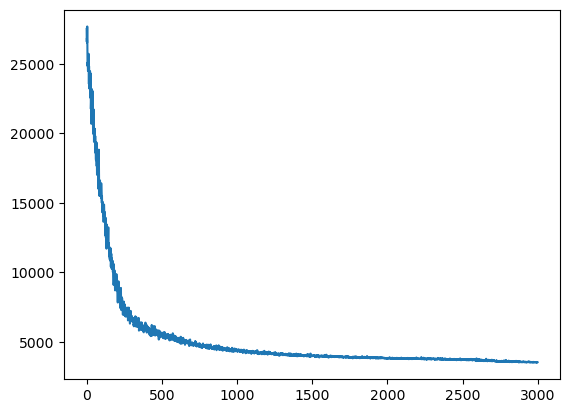

In [4]:
import torch
import pyro
import pyro.distributions as dist
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
device = torch.device("cpu")

num_trials = 100
num_agents = 100
phead = 0.11

num_inf_steps = 3000

agent = Coinflip_agent(num_agents)
coinflip_data = torch.tensor(np.random.choice([0, 1], 
                                              p = [1-phead, phead], 
                                              size = (num_agents, num_trials))) # 0 heads, 1 tails
infer = CoinflipGroupInference(agent, coinflip_data)
infer.infer_posterior(iter_steps = num_inf_steps, num_particles = 10)
plt.plot(infer.loss)

post_sample_df = infer.sample_posterior(n_samples=5000)
post_mean_df = post_sample_df.groupby(['ag_idx'], as_index = False).mean()

Check the inferred means:

In [5]:
print(post_mean_df)
post_mean_df.mean()

    ag_idx   heads_p
0        0  0.059546
1        1  0.141112
2        2  0.061895
3        3  0.124817
4        4  0.073284
..     ...       ...
95      95  0.172843
96      96  0.063045
97      97  0.155835
98      98  0.100477
99      99  0.175969

[100 rows x 2 columns]


ag_idx     49.50000
heads_p     0.11706
dtype: float64

Compute WAIC:

In [6]:
num_waic_samples = 2000
WAIC, loglike, waic_var, pwaic = infer.compute_IC(num_samples = num_waic_samples)

Iterating to compute WAIC, step 0.
Iterating to compute WAIC, step 100.
Iterating to compute WAIC, step 200.
Iterating to compute WAIC, step 300.
Iterating to compute WAIC, step 400.
Iterating to compute WAIC, step 500.
Iterating to compute WAIC, step 600.
Iterating to compute WAIC, step 700.
Iterating to compute WAIC, step 800.
Iterating to compute WAIC, step 900.
Iterating to compute WAIC, step 1000.
Iterating to compute WAIC, step 1100.
Iterating to compute WAIC, step 1200.
Iterating to compute WAIC, step 1300.
Iterating to compute WAIC, step 1400.
Iterating to compute WAIC, step 1500.
Iterating to compute WAIC, step 1600.
Iterating to compute WAIC, step 1700.
Iterating to compute WAIC, step 1800.
Iterating to compute WAIC, step 1900.
Finished WAIC


In [7]:
WAIC

tensor(7535.5371)

In [8]:
pwaic

tensor(354.4013)

## Let's see what comes out when we use the log-likelihood to compute the WAIC with the arviz package:

In [9]:
ll_reshape = loglike.reshape(1, num_waic_samples, num_agents*num_trials)

In [10]:
import arviz as az
import xarray as xr

log_likelihood_da = xr.DataArray(
    ll_reshape,
    dims=["chain", "draw", "observation"],
    coords={
        "chain": [0],  # Assuming a single chain for simplicity
        "draw": np.arange(ll_reshape.shape[1]),
        "observation": np.arange(ll_reshape.shape[2])
    }
)

idata = az.InferenceData(log_likelihood=az.convert_to_dataset(log_likelihood_da))
print(az.waic(idata))
waic = -2*az.waic(idata)['elpd_waic']
print("waic=%.2f"%waic)

/home/sascha/miniforge3/envs/torch/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/sascha/miniforge3/envs/torch/lib/python3.11/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 2000 posterior samples and 10000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -3767.77    73.05
p_waic      354.40        -

There has been a warning during the calculation. Please check the results.
waic=7535.54


In [ ]:
num_trials = [1,3,10,30,100,300,1000]
waics = []
pwaics = []

for trials in num_trials:
    num_inf_steps = 3000
    
    agent = Coinflip_agent(num_agents)
    coinflip_data = torch.tensor(np.random.choice([0, 1], 
                                                  p = [1-phead, phead], 
                                                  size = (num_agents, trials))) # 0 heads, 1 tails
    infer = CoinflipGroupInference(agent, coinflip_data)
    infer.infer_posterior(iter_steps = num_inf_steps, num_particles = 10)

    num_waic_samples = 2000
    WAIC, loglike, waic_var, pwaic = infer.compute_IC(num_samples = num_waic_samples)

    waics.append(WAIC)
    pwaics.append(pwaic)


1 Trials.
Starting inference.


Mean ELBO   0.20: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:07<00:00, 375.92it/s]


Iterating to compute WAIC, step 0.
Iterating to compute WAIC, step 100.
Iterating to compute WAIC, step 200.
Iterating to compute WAIC, step 300.
Iterating to compute WAIC, step 400.
Iterating to compute WAIC, step 500.
Iterating to compute WAIC, step 600.
Iterating to compute WAIC, step 700.
Iterating to compute WAIC, step 800.
Iterating to compute WAIC, step 900.
Iterating to compute WAIC, step 1000.
Iterating to compute WAIC, step 1100.
Iterating to compute WAIC, step 1200.
Iterating to compute WAIC, step 1300.
Iterating to compute WAIC, step 1400.
Iterating to compute WAIC, step 1500.
Iterating to compute WAIC, step 1600.
Iterating to compute WAIC, step 1700.
Iterating to compute WAIC, step 1800.
Iterating to compute WAIC, step 1900.
Finished WAIC
3 Trials.
Starting inference.


Mean ELBO  48.84: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:10<00:00, 289.12it/s]


Iterating to compute WAIC, step 0.
Iterating to compute WAIC, step 100.
Iterating to compute WAIC, step 200.
Iterating to compute WAIC, step 300.
Iterating to compute WAIC, step 400.
Iterating to compute WAIC, step 500.
Iterating to compute WAIC, step 600.
Iterating to compute WAIC, step 700.
Iterating to compute WAIC, step 800.
Iterating to compute WAIC, step 900.
Iterating to compute WAIC, step 1000.
Iterating to compute WAIC, step 1100.
Iterating to compute WAIC, step 1200.
Iterating to compute WAIC, step 1300.
Iterating to compute WAIC, step 1400.
Iterating to compute WAIC, step 1500.
Iterating to compute WAIC, step 1600.
Iterating to compute WAIC, step 1700.
Iterating to compute WAIC, step 1800.
Iterating to compute WAIC, step 1900.
Finished WAIC
10 Trials.
Starting inference.


Mean ELBO 303.12: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:15<00:00, 196.73it/s]


Iterating to compute WAIC, step 0.
Iterating to compute WAIC, step 100.
Iterating to compute WAIC, step 200.
Iterating to compute WAIC, step 300.
Iterating to compute WAIC, step 400.
Iterating to compute WAIC, step 500.
Iterating to compute WAIC, step 600.
Iterating to compute WAIC, step 700.
Iterating to compute WAIC, step 800.
Iterating to compute WAIC, step 900.
Iterating to compute WAIC, step 1000.
Iterating to compute WAIC, step 1100.
Iterating to compute WAIC, step 1200.
Iterating to compute WAIC, step 1300.
Iterating to compute WAIC, step 1400.
Iterating to compute WAIC, step 1500.
Iterating to compute WAIC, step 1600.
Iterating to compute WAIC, step 1700.
Iterating to compute WAIC, step 1800.
Iterating to compute WAIC, step 1900.
Finished WAIC
30 Trials.
Starting inference.


Mean ELBO 994.13: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:33<00:00, 90.73it/s]


Iterating to compute WAIC, step 0.
Iterating to compute WAIC, step 100.
Iterating to compute WAIC, step 200.
Iterating to compute WAIC, step 300.
Iterating to compute WAIC, step 400.
Iterating to compute WAIC, step 500.
Iterating to compute WAIC, step 600.
Iterating to compute WAIC, step 700.
Iterating to compute WAIC, step 800.
Iterating to compute WAIC, step 900.
Iterating to compute WAIC, step 1000.
Iterating to compute WAIC, step 1100.
Iterating to compute WAIC, step 1200.
Iterating to compute WAIC, step 1300.
Iterating to compute WAIC, step 1400.
Iterating to compute WAIC, step 1500.
Iterating to compute WAIC, step 1600.
Iterating to compute WAIC, step 1700.
Iterating to compute WAIC, step 1800.
Iterating to compute WAIC, step 1900.
Finished WAIC
100 Trials.
Starting inference.


Mean ELBO 3547.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [01:38<00:00, 30.53it/s]


Iterating to compute WAIC, step 0.
Iterating to compute WAIC, step 100.
Iterating to compute WAIC, step 200.
Iterating to compute WAIC, step 300.
Iterating to compute WAIC, step 400.
Iterating to compute WAIC, step 500.
Iterating to compute WAIC, step 600.
Iterating to compute WAIC, step 700.
Iterating to compute WAIC, step 800.
Iterating to compute WAIC, step 900.
Iterating to compute WAIC, step 1000.
Iterating to compute WAIC, step 1100.
Iterating to compute WAIC, step 1200.
Iterating to compute WAIC, step 1300.
Iterating to compute WAIC, step 1400.
Iterating to compute WAIC, step 1500.
Iterating to compute WAIC, step 1600.
Iterating to compute WAIC, step 1700.
Iterating to compute WAIC, step 1800.
Iterating to compute WAIC, step 1900.
Finished WAIC
300 Trials.
Starting inference.


Mean ELBO 10623.05: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [04:59<00:00, 10.03it/s]


Iterating to compute WAIC, step 0.
Iterating to compute WAIC, step 100.
Iterating to compute WAIC, step 200.
Iterating to compute WAIC, step 300.
Iterating to compute WAIC, step 400.
Iterating to compute WAIC, step 500.
Iterating to compute WAIC, step 600.
Iterating to compute WAIC, step 700.
Iterating to compute WAIC, step 800.
Iterating to compute WAIC, step 900.
Iterating to compute WAIC, step 1000.
Iterating to compute WAIC, step 1100.
Iterating to compute WAIC, step 1200.
Iterating to compute WAIC, step 1300.
Iterating to compute WAIC, step 1400.
Iterating to compute WAIC, step 1500.
Iterating to compute WAIC, step 1600.
Iterating to compute WAIC, step 1700.
Iterating to compute WAIC, step 1800.
Iterating to compute WAIC, step 1900.
Finished WAIC
1000 Trials.
Starting inference.


Mean ELBO 46671.17:  27%|█████████████████████████████████████████                                                                                                              | 815/3000 [04:28<13:32,  2.69it/s]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(num_trials, waics)
plt.xlabel('number of trials')
plt.ylabel('WAIC')
plt.title('WAIC')
plt.show()

plt.plot(num_trials, pwaics)
plt.title('pwaic')
plt.xlabel('number of trials')
plt.ylabel('pwaic')
plt.show()